In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
data_dir = 'tensorflow_datasets/DATA/train'
# train_dir = os.path.join(data_dir, 'train')
# test_dir = os.path.join(data_dir, 'testing')

In [3]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(128, 128))

Found 440 files belonging to 5 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

In [6]:
# batch[0] image as np
batch[0].shape

(32, 128, 128, 3)

In [7]:
# batch[1] = labels images
# 0 = Acne
# 1 = Actinic Keratosis
# 2 = Basal Cell Carcinoma
# 3 = Eczemaa
# 4 = Rosacea

batch[1]

array([4, 4, 4, 1, 4, 4, 0, 4, 1, 2, 4, 1, 2, 3, 0, 3, 2, 1, 0, 1, 0, 3,
       2, 0, 2, 1, 0, 0, 4, 0, 1, 2])

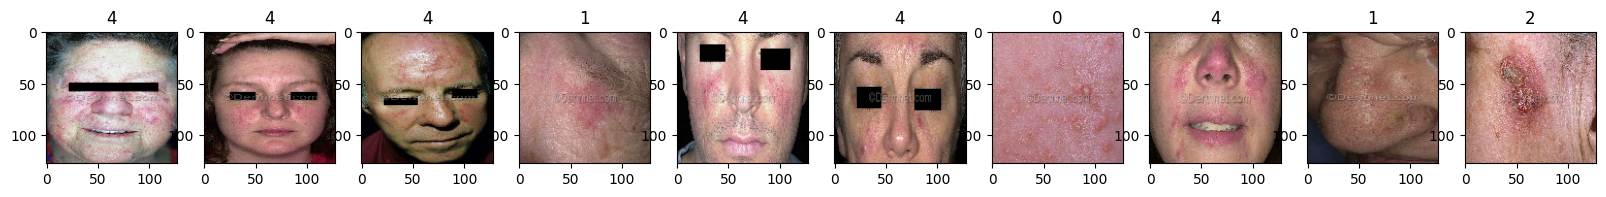

In [8]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#Data Testing

In [9]:
# data_test = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=(128, 128))

In [10]:
# data_iterator_test = data_test.as_numpy_iterator()

In [11]:
# batch_test = data_iterator_test.next()

In [12]:
# # batch[0] image as np
# batch_test[0].shape

In [13]:
# batch[1] labels images
# 0 = Acne
# 1 = Actinic Keratosis
# 2 = Basal Cell Carcinoma
# 3 = Eczemaa
# 4 = Rosacea

# batch_test[1]

In [14]:
# fig, ax = plt.subplots(ncols=10, figsize=(20,20))
# for idx, img in enumerate(batch_test[0][:10]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch_test[1][idx])

Preprocessing Data Training dan Validation

In [15]:
# Scale data dan normalisasi
data = data.map(lambda x, y: (x/255, y))

In [16]:
scale_iterator = data.as_numpy_iterator()

In [17]:
batch = scale_iterator.next()

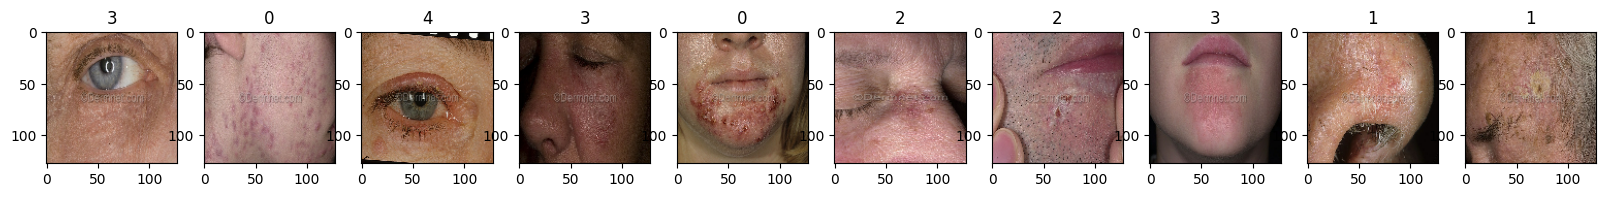

In [18]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Preprocessing Data Testing

In [19]:
# data_test = data_test.map(lambda x, y: (x/255, y))

In [20]:
# scale_iterator_test = data_test.as_numpy_iterator()

In [21]:
# batch_test = scale_iterator_test.next()

In [22]:
# fig, ax = plt.subplots(ncols=10, figsize=(20,20))
# for idx, img in enumerate(batch_test[0][:10]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch_test[1][idx])

Split Dataset(8:1:1)

In [23]:
# Split data
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)+1

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Model Machine Learning (8:1:1)

In [25]:
model = Sequential([
    Conv2D(8, (3,3), 1, activation="relu", input_shape = (128, 128, 3)),
    MaxPooling2D((2,2)),

    Conv2D(16, (3,3), 1, activation="relu"),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), 1, activation="relu"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax'),
])

In [26]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

In [28]:
hist = model.fit(
    train,
    validation_data=val,
    epochs=20,
    batch_size=32
)

Epoch 1/20
11/11 [==============================] - 5s 327ms/step - loss: 1.6620 - accuracy: 0.1875 - val_loss: 1.6790 - val_accuracy: 0.1562
Epoch 2/20
11/11 [==============================] - 4s 315ms/step - loss: 1.5698 - accuracy: 0.2386 - val_loss: 1.4599 - val_accuracy: 0.3125
Epoch 3/20
11/11 [==============================] - 4s 317ms/step - loss: 1.4330 - accuracy: 0.3864 - val_loss: 1.3494 - val_accuracy: 0.2500
Epoch 4/20
11/11 [==============================] - 4s 317ms/step - loss: 1.3776 - accuracy: 0.3949 - val_loss: 1.4354 - val_accuracy: 0.4375
Epoch 5/20
11/11 [==============================] - 4s 316ms/step - loss: 1.2743 - accuracy: 0.4290 - val_loss: 1.2172 - val_accuracy: 0.5312
Epoch 6/20
11/11 [==============================] - 4s 334ms/step - loss: 1.2789 - accuracy: 0.4943 - val_loss: 1.1563 - val_accuracy: 0.5000
Epoch 7/20
11/11 [==============================] - 4s 329ms/step - loss: 1.1182 - accuracy: 0.5483 - val_loss: 1.1010 - val_accuracy: 0.4688
Epoch 

In [29]:
# model.evaluate(test)
model.evaluate(val)

1/1 [==============================] - 1s 883ms/step - loss: 0.1159 - accuracy: 0.9375


[0.1159418523311615, 0.9375]

In [30]:
model.evaluate(test)

2/2 [==============================] - 1s 90ms/step - loss: 0.1751 - accuracy: 0.9464


[0.17509262263774872, 0.9464285969734192]

Evaluasi Model Machine Learning

<function matplotlib.pyplot.show(close=None, block=None)>

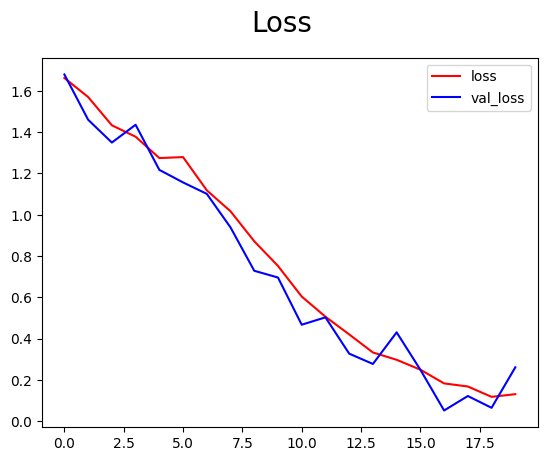

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

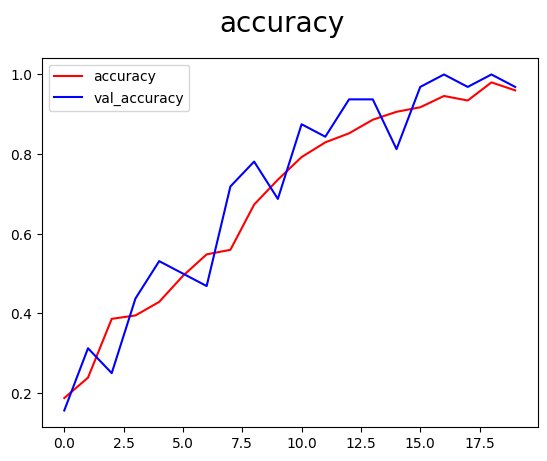

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show

In [33]:
from sklearn.metrics import classification_report

y_true = []
y_pred = []

for batch in test.as_numpy_iterator():
    X, y = batch
    prediction = model.predict(X)
    prediction = np.argmax(prediction, axis=1)
    print(classification_report(y, prediction,
                            target_names=os.listdir(data_dir)))
    y_true.append(y)
    y_pred.append(prediction)
    break

1/1 [==============================] - 0s 248ms/step
                      precision    recall  f1-score   support

                Acne       1.00      0.89      0.94         9
   Actinic Keratosis       1.00      1.00      1.00         3
Basal Cell Carcinoma       0.88      1.00      0.93         7
             Eczemaa       0.75      0.86      0.80         7
             Rosacea       1.00      0.83      0.91         6

            accuracy                           0.91        32
           macro avg       0.93      0.92      0.92        32
        weighted avg       0.92      0.91      0.91        32



In [34]:
y_pred = tf.concat(y_pred, axis=0)
y_true = tf.concat(y_true, axis=0)

In [35]:
y_pred

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([2, 1, 0, 0, 1, 4, 4, 0, 4, 0, 4, 3, 4, 3, 3, 3, 0, 2, 0, 3, 3, 2,
       2, 2, 3, 3, 2, 0, 1, 2, 2, 0], dtype=int64)>

In [36]:
y_true

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([2, 1, 0, 0, 1, 4, 4, 0, 4, 0, 4, 0, 4, 3, 3, 4, 0, 2, 0, 3, 3, 3,
       2, 2, 3, 3, 2, 0, 1, 2, 2, 0])>

In [37]:
Labels = {'Acne': 0,
 'Actinic Keratosis': 1,
 'Basal Cell Carcinoma': 2,
 'Eczemaa': 3,
 'Rosacea': 4}

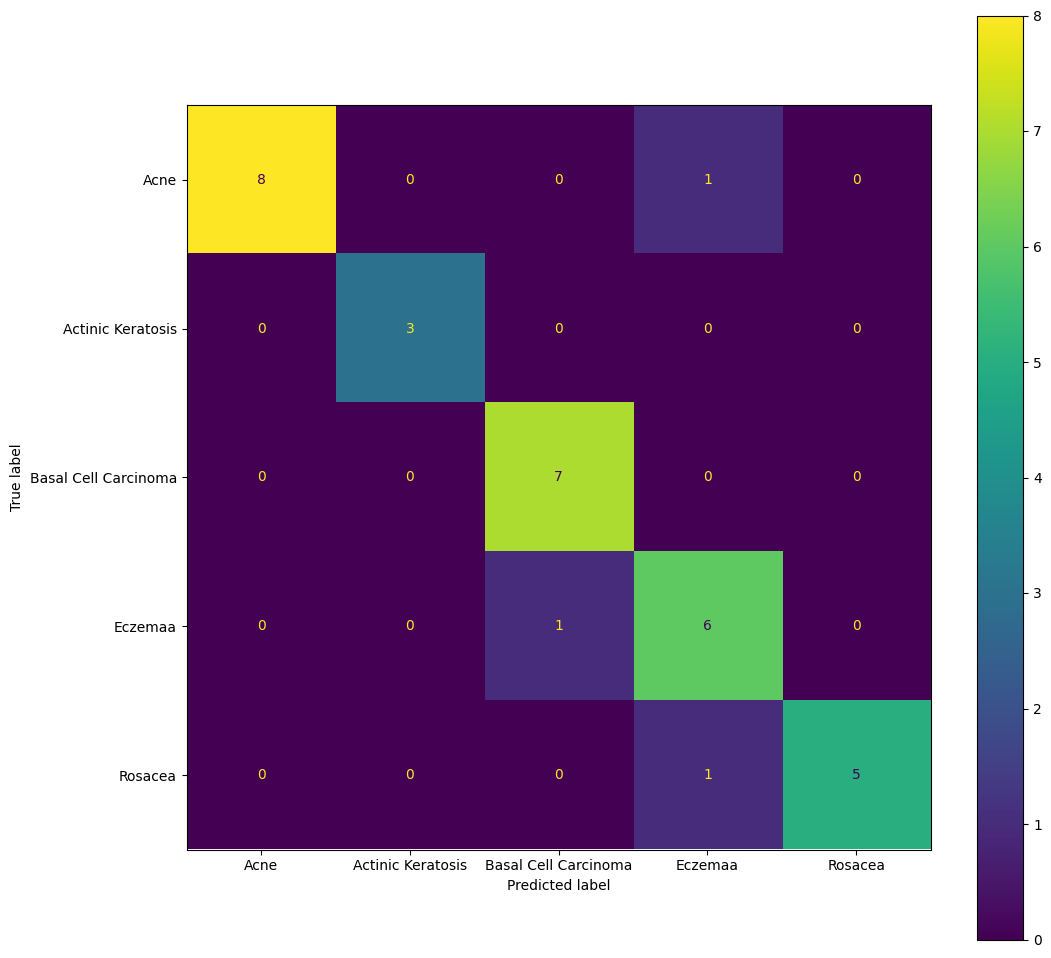

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(12,12))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred,ax=ax ,display_labels = Labels)
plt.show()

Uji Model Klasifikasi

1/1 [==============================] - 0s 136ms/step


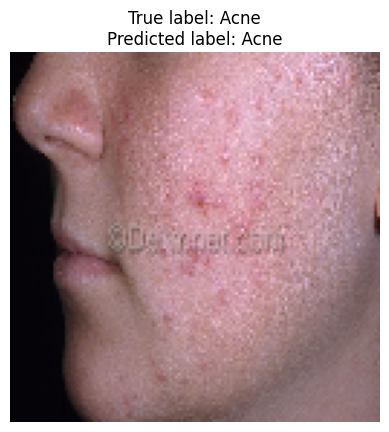

In [39]:
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.utils import normalize

path = 'tensorflow_datasets/DATA/testing/Acne/acne-pustular-29.jpg'
# path =  "https://assets.nhs.uk/nhsuk-cms/images/S_0917_acne_M1080444.max-600x600.jpg"
# img = image.load_img(path, target_size=(128, 128))
# imgplot = plt.imshow(img)
# x = image.img_to_array(img)
# x = normalize(x, axis=1)
# # x = np.expand_dims(x, axis=0)

# # images = np.vstack([x])
# classes = model.predict(x)

# # list_class = os.listdir(data_dir)

# predicted_class = classes.argmax(axis=-1)

# print(predicted_class)
# # for j in range(20):
# #     if classes[0][j] == 1:
# #         print("Image belong to class: ", list_class[j-1])
# #         print("actual:", path)
# #         break

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load image
img = load_img(path, target_size=(128, 128))
# Map index to class name
class_names = os.listdir(data_dir)
imgplot = plt.imshow(img)
true_label = class_names[0]
img_array = img_to_array(img)
batch_img = np.expand_dims(img_array, axis=0)
# Make prediction
prediction = model.predict(batch_img)
# Get the predicted class index
predicted_class_index = prediction.argmax(axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Plot image with true and predicted labels
plt.imshow(img_array.astype(np.uint8))
plt.title(f'True label: {true_label}\nPredicted label: {predicted_class_name}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 34ms/step


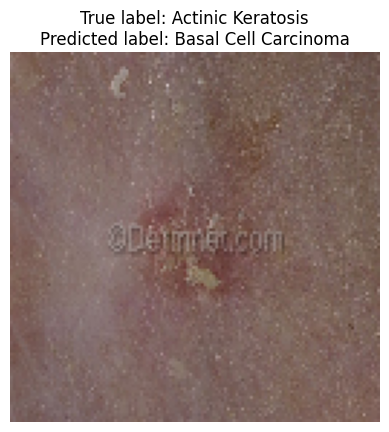

In [40]:
# # from tensorflow.keras.preprocessing import image

path = 'tensorflow_datasets/DATA/testing/Actinic Keratosis/actinic-keratosis-lesion-32.jpg'
# img = image.load_img(path, target_size=(128, 128))
# imgplot = plt.imshow(img)
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)

# images = np.vstack([x])
# classes = model.predict(images)

# list_class = os.listdir(data_dir)

# for j in range(20):
#     if classes[0][j] == 1:
#         print("Image belong to class: ", list_class[j-1])
#         print("actual:", path)
#         break

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load image
img = load_img(path, target_size=(128, 128))
# Map index to class name
class_names = os.listdir(data_dir)
imgplot = plt.imshow(img)
true_label = class_names[1]
img_array = img_to_array(img)
batch_img = np.expand_dims(img_array, axis=0)
# Make prediction
prediction = model.predict(batch_img)
# Get the predicted class index
predicted_class_index = prediction.argmax(axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Plot image with true and predicted labels
plt.imshow(img_array.astype(np.uint8))
plt.title(f'True label: {true_label}\nPredicted label: {predicted_class_name}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 35ms/step


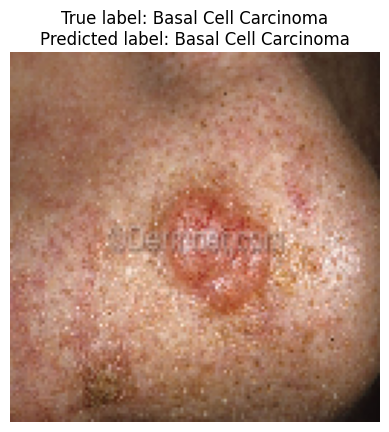

In [41]:
# from tensorflow.keras.preprocessing import image

path = 'tensorflow_datasets/DATA/testing/Basal Cell Carcinoma/basal-cell-carcinoma-nose-71.jpg'
# img = image.load_img(path, target_size=(128, 128))
# imgplot = plt.imshow(img)
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)

# images = np.vstack([x])
# classes = model.predict(images)

# list_class = os.listdir(data_dir)

# for j in range(20):
#     if classes[0][j] == 1:
#         print("Image belong to class: ", list_class[j-1])
#         print("actual:", path)
#         break
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load image
img = load_img(path, target_size=(128, 128))
# Map index to class name
class_names = os.listdir(data_dir)
imgplot = plt.imshow(img)
true_label = class_names[2]
img_array = img_to_array(img)
batch_img = np.expand_dims(img_array, axis=0)
# Make prediction
prediction = model.predict(batch_img)
# Get the predicted class index
predicted_class_index = prediction.argmax(axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Plot image with true and predicted labels
plt.imshow(img_array.astype(np.uint8))
plt.title(f'True label: {true_label}\nPredicted label: {predicted_class_name}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 37ms/step


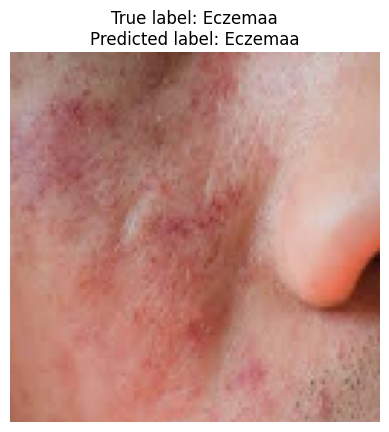

In [42]:
# from tensorflow.keras.preprocessing import image

path = 'tensorflow_datasets/DATA/testing/Eczemaa/eczema.jpg'
# img = image.load_img(path, target_size=(128, 128))
# imgplot = plt.imshow(img)
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)

# images = np.vstack([x])
# classes = model.predict(images)

# list_class = os.listdir(data_dir)

# for j in range(20):
#     if classes[0][j] == 1:
#         print("Image belong to class: ", list_class[j-1])
#         print("actual:", path)
#         break
        
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load image
img = load_img(path, target_size=(128, 128))
# Map index to class name
class_names = os.listdir(data_dir)
imgplot = plt.imshow(img)
true_label = class_names[3]
img_array = img_to_array(img)
batch_img = np.expand_dims(img_array, axis=0)
# Make prediction
prediction = model.predict(batch_img)
# Get the predicted class index
predicted_class_index = prediction.argmax(axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Plot image with true and predicted labels
plt.imshow(img_array.astype(np.uint8))
plt.title(f'True label: {true_label}\nPredicted label: {predicted_class_name}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 32ms/step


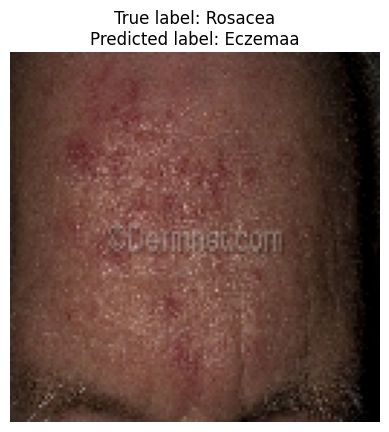

In [43]:
# from tensorflow.keras.preprocessing import image
# # 
path = 'tensorflow_datasets/DATA/testing/Rosacea/rosacea-8.jpg'
# img = image.load_img(path, target_size=(128, 128))
# imgplot = plt.imshow(img)
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)

# images = np.vstack([x])
# classes = model.predict(images)

# list_class = os.listdir(data_dir)

# for j in range(20):
#     if classes[0][j] == 1:
#         print("Image belong to class: ", list_class[j-1])
#         print("actual:", path)
#         break

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load image
img = load_img(path, target_size=(128, 128))
# Map index to class name
class_names = os.listdir(data_dir)
imgplot = plt.imshow(img)
true_label = class_names[4]
img_array = img_to_array(img)
batch_img = np.expand_dims(img_array, axis=0)
# Make prediction
prediction = model.predict(batch_img)
# Get the predicted class index
predicted_class_index = prediction.argmax(axis=-1)[0]
predicted_class_name = class_names[predicted_class_index]

# Plot image with true and predicted labels
plt.imshow(img_array.astype(np.uint8))
plt.title(f'True label: {true_label}\nPredicted label: {predicted_class_name}')
plt.axis('off')
plt.show()

In [44]:
model.save("My_model.h5")

In [45]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model_klasifikasi_penyakit_kulit_wajah.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Yusuf\AppData\Local\Temp\tmpqzbbe510\assets


INFO:tensorflow:Assets written to: C:\Users\Yusuf\AppData\Local\Temp\tmpqzbbe510\assets
